# Hyperparameter plots

### Classification model

In [1]:
SimpleRNN_hidden = []
SimpleRNN_epochs = []
SimpleRNN_f1 = []

LSTM_hidden = []
LSTM_epochs = []
LSTM_f1 = []

GRU_hidden = []
GRU_epochs = []
GRU_f1 = []

with open ("./hyperparameter_tuning/RNN_classification.csv", "r") as infile:
    data = infile.read()
    rows = data.split("\n")
    for row in rows:
        items = row.split(",")
        if items[0] == "<class 'keras.src.layers.rnn.simple_rnn.SimpleRNN'>":
            SimpleRNN_hidden.append(int(items[1]))
            SimpleRNN_epochs.append(int(items[2]))
            SimpleRNN_f1.append(float(items[3]))
        elif items[0] == "<class 'keras.src.layers.rnn.lstm.LSTM'>":
            LSTM_hidden.append(int(items[1]))
            LSTM_epochs.append(int(items[2]))
            LSTM_f1.append(float(items[3]))
        elif items[0] == "<class 'keras.src.layers.rnn.gru.GRU'>":
            GRU_hidden.append(int(items[1]))
            GRU_epochs.append(int(items[2]))
            GRU_f1.append(float(items[3]))

In [2]:
max_f1 = -1  # start with a low value
best_config = None  # to store the best row info (optional)

with open("./hyperparameter_tuning/RNN_classification.csv", "r") as infile:
    data = infile.read()
    rows = data.split("\n")
    for row in rows:
        if not row.strip():  # skip empty lines
            continue
        items = row.split(",")
        try:
            f1 = float(items[3])
            if f1 > max_f1:
                max_f1 = f1
                best_config = items  # optional: keep full row
        except (IndexError, ValueError):
            continue  # skip malformed rows

print("Highest f1:", max_f1)
print("Best config:", best_config)

Highest f1: 0.5557085484796328
Best config: ["<class 'keras.src.layers.rnn.lstm.LSTM'>", '16', '200', '0.5557085484796328']


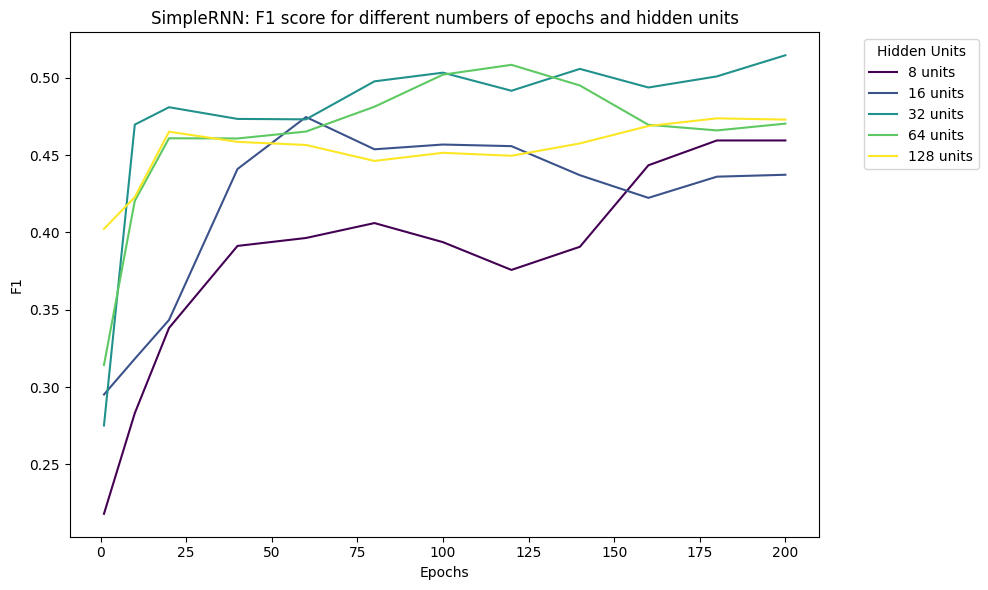

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

simple_data = list(zip(SimpleRNN_hidden, SimpleRNN_epochs, SimpleRNN_f1))

from collections import defaultdict
grouped = defaultdict(list)

for hidden, epoch, f1 in simple_data:
    grouped[hidden].append((epoch, f1))

colors = cm.viridis(np.linspace(0, 1, len(grouped)))

plt.figure(figsize=(10, 6))

for i, (hidden_units, values) in enumerate(sorted(grouped.items())):
    values.sort()
    epochs, f1s = zip(*values)
    plt.plot(epochs, f1s, label=f'{hidden_units} units', color=colors[i])

plt.xlabel('Epochs')
plt.ylabel('F1')
plt.title('SimpleRNN: F1 score for different numbers of epochs and hidden units')
plt.legend(title='Hidden Units', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


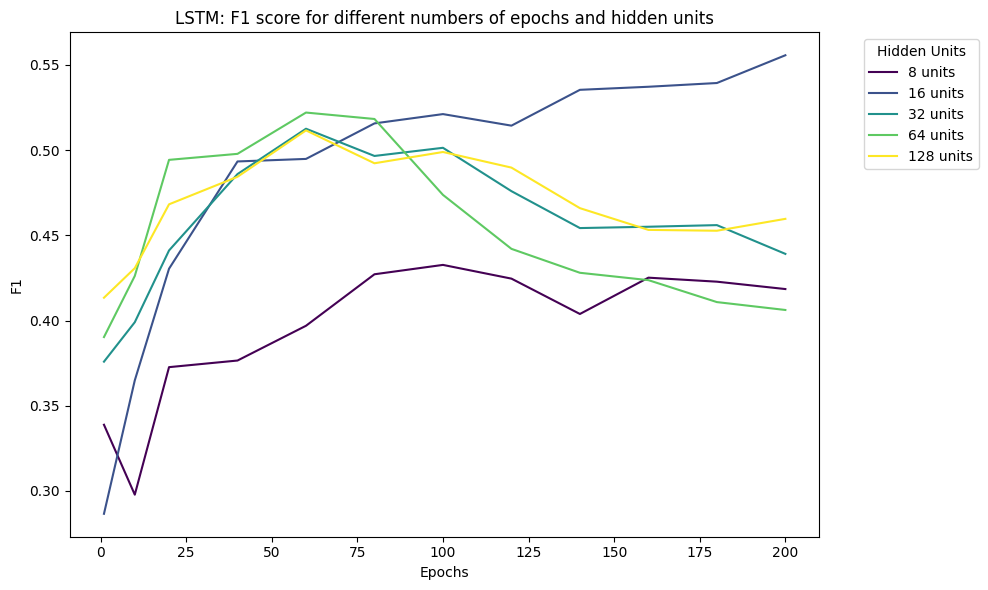

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

LSTM_data = list(zip(LSTM_hidden, LSTM_epochs, LSTM_f1))

from collections import defaultdict
grouped = defaultdict(list)

for hidden, epoch, f1 in LSTM_data:
    grouped[hidden].append((epoch, f1))

colors = cm.viridis(np.linspace(0, 1, len(grouped)))

plt.figure(figsize=(10, 6))

for i, (hidden_units, values) in enumerate(sorted(grouped.items())):
    values.sort()
    epochs, f1s = zip(*values)
    plt.plot(epochs, f1s, label=f'{hidden_units} units', color=colors[i])

plt.xlabel('Epochs')
plt.ylabel('F1')
plt.title('LSTM: F1 score for different numbers of epochs and hidden units')
plt.legend(title='Hidden Units', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


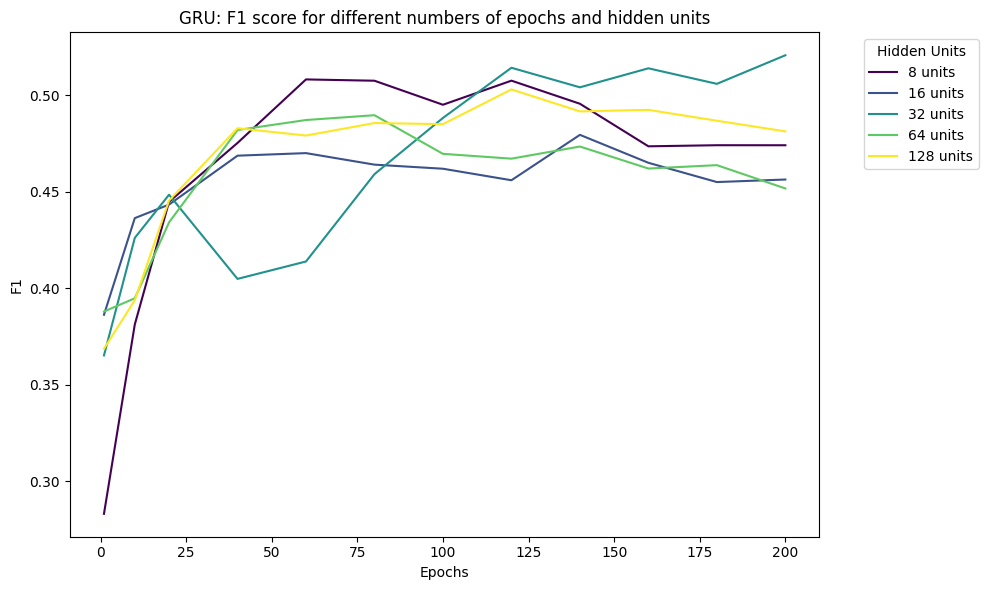

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

GRU_data = list(zip(GRU_hidden, GRU_epochs, GRU_f1))

from collections import defaultdict
grouped = defaultdict(list)

for hidden, epoch, f1 in GRU_data:
    grouped[hidden].append((epoch, f1))

colors = cm.viridis(np.linspace(0, 1, len(grouped)))

plt.figure(figsize=(10, 6))

for i, (hidden_units, values) in enumerate(sorted(grouped.items())):
    values.sort()
    epochs, f1s = zip(*values)
    plt.plot(epochs, f1s, label=f'{hidden_units} units', color=colors[i])

plt.xlabel('Epochs')
plt.ylabel('F1')
plt.title('GRU: F1 score for different numbers of epochs and hidden units')
plt.legend(title='Hidden Units', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


### Regression model

In [6]:
SimpleRNN_hidden = []
SimpleRNN_epochs = []
SimpleRNN_MAE = []

LSTM_hidden = []
LSTM_epochs = []
LSTM_MAE = []

GRU_hidden = []
GRU_epochs = []
GRU_MAE = []

with open ("./hyperparameter_tuning/RNN_regression.csv", "r") as infile:
    data = infile.read()
    rows = data.split("\n")
    for row in rows:
        items = row.split(",")
        if items[0] == "<class 'keras.src.layers.rnn.simple_rnn.SimpleRNN'>":
            SimpleRNN_hidden.append(int(items[1]))
            SimpleRNN_epochs.append(int(items[2]))
            SimpleRNN_MAE.append(float(items[3]))
        elif items[0] == "<class 'keras.src.layers.rnn.lstm.LSTM'>":
            LSTM_hidden.append(int(items[1]))
            LSTM_epochs.append(int(items[2]))
            LSTM_MAE.append(float(items[3]))
        elif items[0] == "<class 'keras.src.layers.rnn.gru.GRU'>":
            GRU_hidden.append(int(items[1]))
            GRU_epochs.append(int(items[2]))
            GRU_MAE.append(float(items[3]))

In [7]:
print(sorted(SimpleRNN_MAE))
print(sorted(LSTM_MAE))
print(sorted(GRU_MAE))

[0.6074029803276062, 0.6079760789871216, 0.6080226302146912, 0.6080846786499023, 0.6088370084762573, 0.6116273999214172, 0.6138107180595398, 0.621462345123291, 0.6339772939682007, 0.6493178009986877, 0.6706981658935547, 0.6901499032974243, 0.7002092599868774, 0.7013241648674011, 0.7019448280334473, 0.7028374075889587, 0.7028981447219849, 0.7042487263679504, 0.7055040001869202, 0.7062222361564636, 0.7073109745979309, 0.7076532244682312, 0.7088889479637146, 0.7092020511627197, 0.710481584072113, 0.7106457352638245, 0.7108263969421387, 0.7114925384521484, 0.7115380764007568, 0.7115738391876221, 0.7120396494865417, 0.7123317718505859, 0.7124451994895935, 0.7132375836372375, 0.713779866695404, 0.7142387628555298, 0.7148400545120239, 0.7150764465332031, 0.7152074575424194, 0.7155241370201111, 0.7161871790885925, 0.7175545692443848, 0.7182974815368652, 0.7184726595878601, 0.7208631634712219, 0.7215523719787598, 0.7224391102790833, 0.7227798104286194, 0.7279711365699768, 0.7281297445297241, 0.

In [8]:
min_mae = 1000
best_config = None

with open("./hyperparameter_tuning/RNN_regression.csv", "r") as infile:
    data = infile.read()
    rows = data.split("\n")
    for row in rows:
        if not row.strip():
            continue
        items = row.split(",")
        try:
            mae = float(items[3].strip())
            if mae < min_mae:
                min_mae = mae
                best_config = items
        except (IndexError, ValueError):
            continue

print("Lowest MAE:", min_mae)
print("Best config:", best_config)
print("MAE, MSE, R2:", best_config[3], best_config[4], best_config[5])

Lowest MAE: 0.6074029803276062
Best config: ["<class 'keras.src.layers.rnn.simple_rnn.SimpleRNN'>", '8', '170', '0.6074029803276062', '0.6578250527381897', '-0.03017890453338623']
MAE, MSE, R2: 0.6074029803276062 0.6578250527381897 -0.03017890453338623


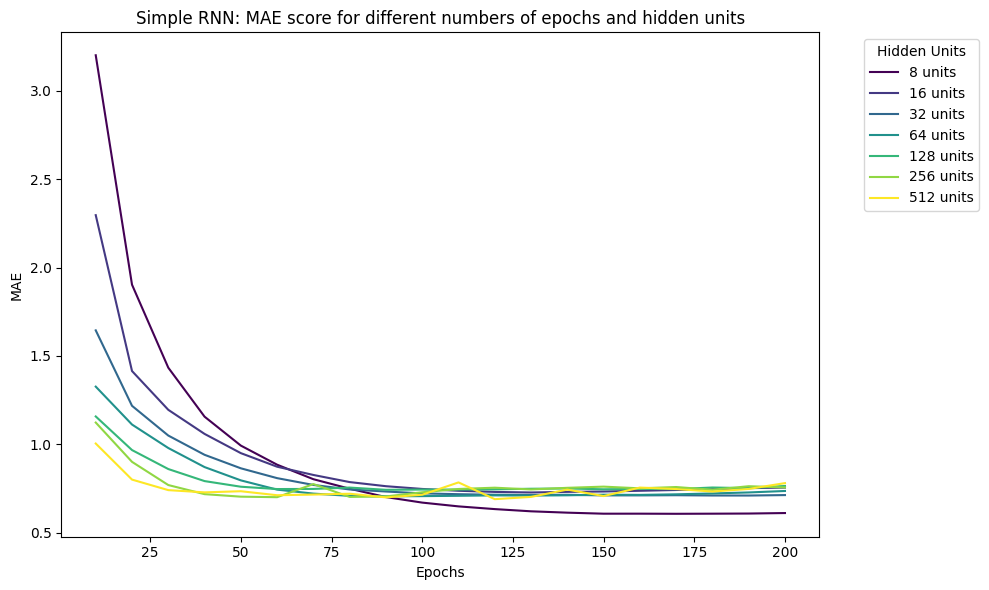

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

simple_data = list(zip(SimpleRNN_hidden, SimpleRNN_epochs, SimpleRNN_MAE))

from collections import defaultdict
grouped = defaultdict(list)

for hidden, epoch, mae in simple_data:
    grouped[hidden].append((epoch, mae))

colors = cm.viridis(np.linspace(0, 1, len(grouped)))

plt.figure(figsize=(10, 6))

for i, (hidden_units, values) in enumerate(sorted(grouped.items())):
    values.sort()
    epochs, maes = zip(*values)
    plt.plot(epochs, maes, label=f'{hidden_units} units', color=colors[i])

plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('Simple RNN: MAE score for different numbers of epochs and hidden units')
plt.legend(title='Hidden Units', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


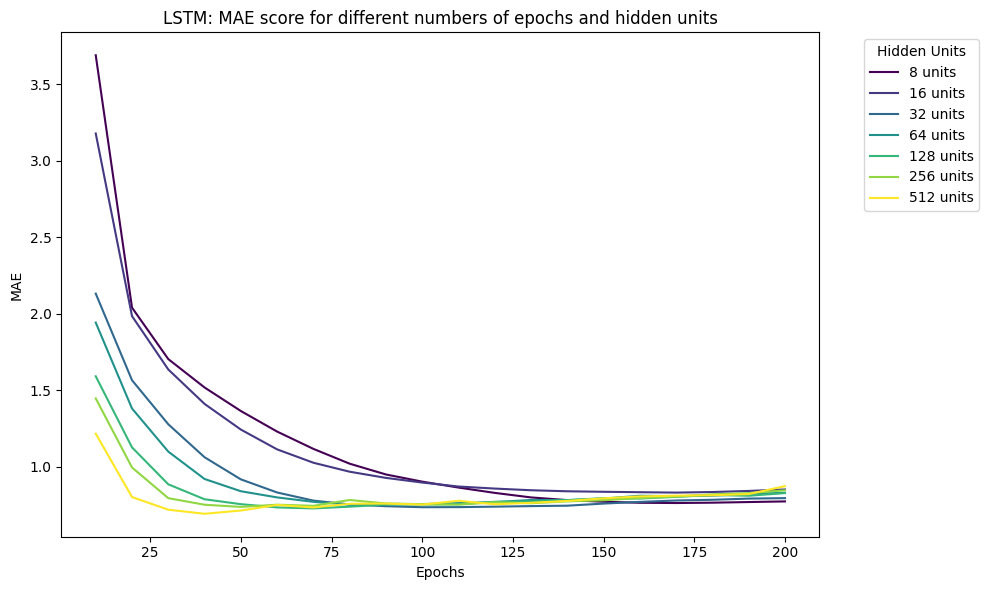

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

LSTM_data = list(zip(LSTM_hidden, LSTM_epochs, LSTM_MAE))

from collections import defaultdict
grouped = defaultdict(list)

for hidden, epoch, mae in LSTM_data:
    grouped[hidden].append((epoch, mae))

colors = cm.viridis(np.linspace(0, 1, len(grouped)))

plt.figure(figsize=(10, 6))

for i, (hidden_units, values) in enumerate(sorted(grouped.items())):
    values.sort()
    epochs, maes = zip(*values)
    plt.plot(epochs, maes, label=f'{hidden_units} units', color=colors[i])

plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('LSTM: MAE score for different numbers of epochs and hidden units')
plt.legend(title='Hidden Units', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


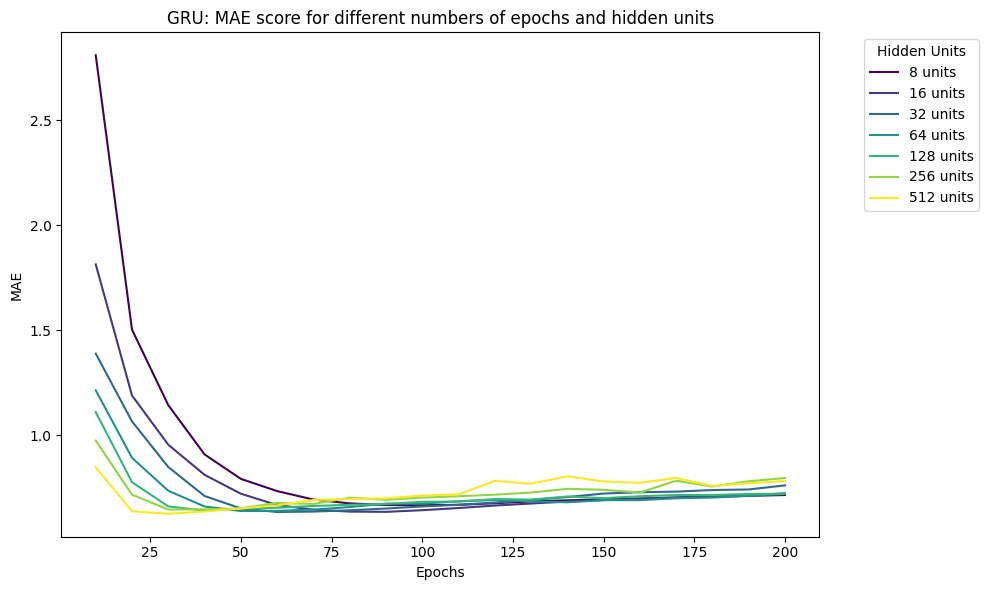

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

GRU_data = list(zip(GRU_hidden, GRU_epochs, GRU_MAE))

from collections import defaultdict
grouped = defaultdict(list)

for hidden, epoch, mae in GRU_data:
    grouped[hidden].append((epoch, mae))

colors = cm.viridis(np.linspace(0, 1, len(grouped)))

plt.figure(figsize=(10, 6))

for i, (hidden_units, values) in enumerate(sorted(grouped.items())):
    values.sort()
    epochs, maes = zip(*values)
    plt.plot(epochs, maes, label=f'{hidden_units} units', color=colors[i])

plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.title('GRU: MAE score for different numbers of epochs and hidden units')
plt.legend(title='Hidden Units', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
